In [11]:
using Controlz # this *might* take a few min to compile
using PyPlot # for plotting via matplotlib

# (optional) hipster plot theme
PyPlot.matplotlib.style.use(normpath(joinpath(pathof(Controlz), "..", "hipster.mplstyle")))

*complete this notebook for five points extra credit for the studios. upload on Canvas when complete.*

# two inputs, one output

cold wind at temperature $T_a$ and velocity $v=v(t)$ blows across a tank containing liquid water at temperature $T=T(t)$. a flame is heating the tank, fed by natural gas at flow rate $n$.

<img src="https://raw.githubusercontent.com/SimonEnsemble/control_theory_demos/master/studios/natural_gas_heater.png" width=600>

an energy balance for this process, followed by linearization, leads to the following transfer function model for this process:

\begin{equation}
\mathcal{T}^*(s)=G_v(s) V^*(s) + G_n(s) N^*(s)
\end{equation}

* transfer function $G_v(s)$ describes how changes in $v$ affect changes in $T$
* transfer function $G_n(s)$ describes how changes in $n$ affect changes in $T$
* the effects of the two inputs, $v$ and $n$, on the output $T$ are additive (this is a linear model!)

the two transfer functions are below. I did the hard work of substituting in the values of $T_a$, $\Delta H_c$, $\bar{v}$, etc. to give the transfer function in numerical form. 

In [12]:
Gv = - 2.0 / (5.0 * s + 1)


   -2.0
-----------
5.0*s + 1.0

In [13]:
Gn = 8.0 / (5.0 * s + 1)


    8.0
-----------
5.0*s + 1.0

(1) what are the gains of the transfer functions `Gv` and `Gn`? confirm with `zero_frequency_gain` (see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#Controlz.zero_frequency_gain))

In [14]:
zero_frequency_gain(Gv)

-2.0

In [15]:
zero_frequency_gain(Gn)

8.0

(2) why are the gains opposite sign? rationalize the sign of each gain.

the gain of $G_v(s)$ is negative because increasing the velocity of cold air pulls heat from the vessel and lowers the temperature of the water. the gain of $G_n(s)$ is positive because increasing the flow rate of natural gas to the furnace increases the heat intput into the tank and raises its temperature.

(3) the velocity of the wind suddenly increases (at $t=0$) from its steady state value by 2 units, while the flow rate of natural gas remains at its steady state value. model this input as a step input. 

(3a) use `Controlz.jl` to determine the response $T^*(s)$ in the frequency domain. 

(3b) simulate and visualize the response $T^*(t)$ for $t\in[0, 20]$. (see [docs](https://simonensemble.github.io/Controlz.jl/dev/))

In [16]:
Uv = 2.0 / s
T_of_s = Gv * Uv


     -4.0
---------------
5.0*s^2 + 1.0*s

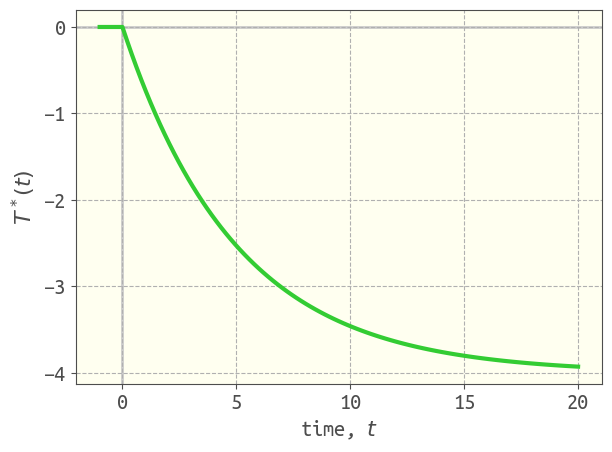

In [17]:
t, T_of_t = simulate(T_of_s, 20.0)
viz_response(t, T_of_t, plot_ylabel=L"$T^*(t)$")

(4) as in Q(3), the velocity of the wind suddenly increases from steady state by 2 units. to counteract the influence of the cold wind on the temperature of the water in the tank, you wish to increase the flow rate of natural gas, $n$. 

(4a) by how much should you increase $n$?

(4b) simulate the effect of these two inputs together to confirm that this bump in the natural gas flow rate counteracts the cold wind.

the gain of $G_v$ is -2, thus the increase in air will reduce the temperature by 4 units.

the gain of $G_n$ is 8, thus we should increase $n$  by 1/2 to increase the temperature by 4 units to counteract the effect of the cold air.

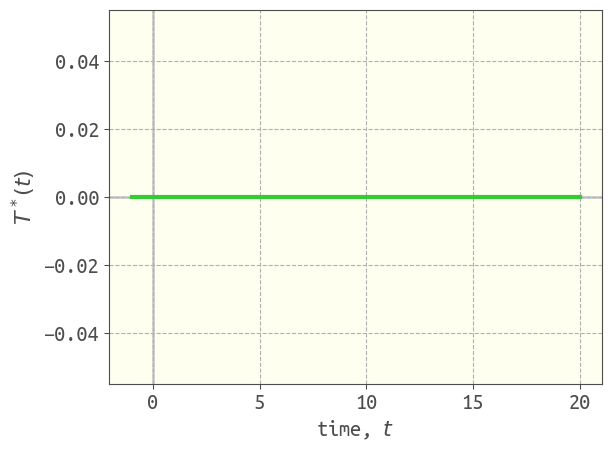

In [19]:
Uv = 2.0 / s
Un = 0.5 / s
T_of_s = Gv * Uv + Gn * Un

t, T_of_t = simulate(T_of_s, 20.0)
viz_response(t, T_of_t, plot_ylabel=L"$T^*(t)$")